<a href="https://colab.research.google.com/github/raikwarswati/Income-Inequality-Analysis/blob/main/USCensusData_Understanding_Income_Inequality_RaikwarS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly


In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots




## Data Description ( As given in source)

- **Age**: Continuous.
- **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt (ignore)**: Continuous.
- **Education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **Education-num**: Continuous.
- **Marital Status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **Occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **Relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **Race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **Sex**: Female, Male.
- **Capital Gain**: Continuous.
- **Capital Loss**: Continuous.
- **Hours per Week**: Continuous.
- **Native Country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad & Tobago, Peru, Hong, Holand-Netherlands.
- **Salary (Dependent Variable)**: <50K or >50K.


In [ ]:
# loading and reviewing the data, we noticed after reviewing the file only has data no headers

# Define your column names
column_names = ["Age", "Workclass", "fnlwgt", "Education", "Education-num",
                "Marital Status", "Occupation", "Relationship", "Race",
                "Sex", "Capital Gain", "Capital Loss", "Hours per Week",
                "Native Country", "Salary"]

# Read the CSV file
df = pd.read_csv("/content/adult-all.csv", names=column_names)

# Display the first few rows of the DataFrame
df.head()


Age         Workclass  fnlwgt  Education  Education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       Marital Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital Gain  Capital Loss  Hours per Week Native Country Salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [ ]:
# understanding basic data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital Status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital Gain    48842 non-null  int64 
 11  Capital Loss    48842 non-null  int64 
 12  Hours per Week  48842 non-null  int64 
 13  Native Country  48842 non-null  object
 14  Salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Data Inspection Results:**

* Shape of the Dataset: The dataset contains 48,841 rows and 15 columns.

* Data Types:

  * Numerical: 'Age', 'fnlwgt', 'Education-num', 'Capital Gain', 'Capital Loss', 'Hours per Week'.
  * Categorical: 'Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native Country', 'Salary'.

* Statistical Summary:

  * The numerical features show a wide range of values. For example, 'Age' ranges from 17 to 90, and 'Capital Gain' has a maximum value of 99,999.
  * The mean and median ('50%') values for most numerical features suggest varying distributions.
  * Missing Values: The initial check does not reveal any missing values. However, in datasets like this, missing values are often represented by placeholders (like '?'). We need to check for such instances.

In [ ]:
# Inspecting the dataset

# Shape of the dataset
shape = df.shape

# Data types of each column
data_types = df.dtypes

# Statistical summary of numerical features
statistical_summary = df.describe()

# Checking for missing or null values
missing_values = df.isnull().sum()

shape, data_types, statistical_summary, missing_values

((48842, 15),
 Age                int64
 Workclass         object
 fnlwgt             int64
 Education         object
 Education-num      int64
 Marital Status    object
 Occupation        object
 Relationship      object
 Race              object
 Sex               object
 Capital Gain       int64
 Capital Loss       int64
 Hours per Week     int64
 Native Country    object
 Salary            object
 dtype: object,
                 Age        fnlwgt  Education-num  Capital Gain  Capital Loss  \
 count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
 mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
 std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
 min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
 25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
 50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
 75%       48

Upon inspecting the categorical columns, it's evident that some columns contain placeholder values denoted by '?'. Specifically, the following columns have these placeholders:

* Workclass: 2,799 entries
* Occupation: 2,809 entries
* Native Country: 857 entries


Given the number of entries with '?', removing all such rows might lead to a significant loss of data. We should consider imputation or treating them as separate categories.

### Handling Placeholders:

Decide on and apply a strategy for handling the '?' placeholders.

In [ ]:
# Checking for placeholders or unusual entries in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Counting the frequency of unique values in each categorical column
placeholder_counts = {column: df[column].value_counts() for column in categorical_columns}

placeholder_counts


{'Workclass': Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
 Name: Workclass, dtype: int64,
 'Education': HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
 Name: Education, dtype: int64,
 'Marital Status': Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
 Name: Marital Status, dtype: int64,
 'Occupation': Prof-

In [ ]:
# Calculating the proportion of '?' in the identified columns
missing_proportions = {column: (df[column] == '?').mean() for column in ['Workclass', 'Occupation', 'Native Country']}
missing_proportions

{'Workclass': 0.05730723557593874,
 'Occupation': 0.05751197739650301,
 'Native Country': 0.017546374022357807}

Proportion of missing values:

* Workclass: Approximately 5.73%
* Occupation: Approximately 5.75%
* Native Country: Approximately 1.75%

In [ ]:
# After replacing '?' with NaN, the counts of missing values are as follows:

# Replacing '?' with NaN
df.replace('?', np.nan, inplace=True)

# Checking the count of missing values after replacement
missing_values_after_replacement = df.isnull().sum()
missing_values_after_replacement.sort_values(ascending=False)

Occupation        2809
Workclass         2799
Native Country     857
Age                  0
fnlwgt               0
Education            0
Education-num        0
Marital Status       0
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per Week       0
Salary               0
dtype: int64

Imputation Strategies:

* For `Workclass` and `Occupation`, we can consider using the most frequent category for imputation, as they are categorical variables.
* For `Native Country`, given the lower proportion of missing values, we might also consider the most frequent category or a more sophisticated imputation method if needed.

In [ ]:
# Impute missing values with the most frequent category
for column in ['Workclass', 'Occupation', 'Native Country']:
    most_frequent_category = df[column].mode()[0]
    df[column].fillna(most_frequent_category, inplace=True)


In [ ]:
# Checking the count of missing values after imputation
missing_values_after_replacement = df.isnull().sum()
missing_values_after_replacement.sort_values(ascending=False)

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per Week    0
Native Country    0
Salary            0
dtype: int64

In [ ]:
# Verify imputation
print("\nMissing values after imputation:")
print(df[['Workclass', 'Occupation', 'Native Country']].isnull().sum())


Missing values after imputation:
Workclass         0
Occupation        0
Native Country    0
dtype: int64


In [ ]:
df.head()

Age         Workclass  fnlwgt  Education  Education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       Marital Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital Gain  Capital Loss  Hours per Week Native Country Salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [ ]:
# getting statistical understanding of categorical columns
df.describe(include="object")

Workclass Education      Marital Status      Occupation Relationship  \
count      48842     48842               48842           48842        48842   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       36705     15784               22379            8981        19716   

         Race    Sex Native Country Salary  
count   48842  48842          48842  48842  
unique      5      2             41      2  
top     White   Male  United-States  <=50K  
freq    41762  32650          44689  37155

In [ ]:
# getting statistical understanding of categorical columns
df.describe()

Age        fnlwgt  Education-num  Capital Gain  Capital Loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       Hours per Week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [ ]:
# getting statistical understanding of categorical columns
df.isna().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per Week    0
Native Country    0
Salary            0
dtype: int64

### Dropping Unnecessary columns

The `fnlwgt` column does not add any value and can be ignored . We can drop it using df.

In [ ]:
# dropping fnlwgt column
data = df.drop(columns='fnlwgt', axis=1)
data.head()

Age         Workclass  Education  Education-num      Marital Status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          Occupation   Relationship   Race     Sex  Capital Gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   Capital Loss  Hours per Week Native Country Salary  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K

### Converting Categorical to Numerical

For categorical variables, we'll convert them into a format suitable for modeling, such as one-hot encoding

In [ ]:
# Converting categorical variables
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = LabelEncoder().fit_transform(data[column])

# Exploratory Data Analysis (EDA)

## Univariate Analysis

Understanding each individual feature

In [ ]:
def plot_numerical_insights(df, column_name):
    """
    Plot histogram and boxplot for a given continuous variable, print its descriptive statistics,
    and provide enhanced insights including multi-modal analysis.

    :param df: pandas DataFrame
    :param column_name: str, name of the column to analyze
    """
    # Descriptive statistics, skewness, and kurtosis
    stats = df[column_name].describe()
    skewness = df[column_name].skew()
    kurtosis = df[column_name].kurt()

    # Creating subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Histogram of {column_name}", f"Boxplot of {column_name}"))

    # Histogram
    fig.add_trace(go.Histogram(x=df[column_name], nbinsx=30), row=1, col=1)

    # Boxplot
    fig.add_trace(go.Box(y=df[column_name]), row=1, col=2)

    # Update layout
    fig.update_layout(height=400, width=800, title_text=f"Univariate Analysis of {column_name}", showlegend=False)
    fig.show()

    # Print descriptive statistics
    print(f"Descriptive Statistics for {column_name}:\n{stats}\n")

    # Enhanced Insights
    print(f"Insights for {column_name}:")
    common_range = f"{stats['25%']:.2f} to {stats['75%']:.2f}"
    print(f"- Most of the {column_name} data is concentrated in the range {common_range}.")
    print(f"- Average (Mean) Value: {stats['mean']:.2f}.")
    print(f"- The distribution is {'left' if skewness < 0 else 'right'}-skewed, indicating a {'lower values' if skewness < 0 else 'higher values'}  tendency.")

    # Check for multi-modality
    hist_data, bin_edges = np.histogram(df[column_name], bins=30)
    peaks = np.where(hist_data > np.mean(hist_data) + np.std(hist_data))[0]
    if len(peaks) > 1:
        peak_ranges = [f"{bin_edges[peak]:.2f} to {bin_edges[peak+1]:.2f}" for peak in peaks]
        print(f"- The histogram shows multiple peaks (multi-modal distribution) in the ranges: {', '.join(peak_ranges)}. This suggests distinct sub-groups within the {column_name} data.")
    else:
        print(f"- The histogram does not show multiple peaks, suggesting a more uniform distribution.")

    # Comment on outliers
    if df[column_name].max() > stats['75%'] + 1.5 * (stats['75%'] - stats['25%']):
        print(f"- There are outliers in {column_name}, especially for values higher than the upper quartile.")
    else:
        print(f"- There are no significant outliers in {column_name}.")

### 1. Age

In [ ]:
plot_numerical_insights(data, 'Age')


Descriptive Statistics for Age:
count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

Insights for Age:
- Most of the Age data is concentrated in the range 28.00 to 48.00.
- Average (Mean) Value: 38.64.
- The distribution is right-skewed, indicating a higher values  tendency.
- The histogram shows multiple peaks (multi-modal distribution) in the ranges: 21.87 to 24.30, 26.73 to 29.17, 31.60 to 34.03, 38.90 to 41.33, 43.77 to 46.20. This suggests distinct sub-groups within the Age data.
- There are outliers in Age, especially for values higher than the upper quartile.


**Insights:** From the plot generated for Age we can say the data is left skewed and most of the population belong in the range 28 to 48 and the average age is 37 years in the given dataset however we do have outliers with age after 80 as well

#### 2. Education num

This column describes number of years in education

In [ ]:
plot_numerical_insights(data, 'Education-num')


Descriptive Statistics for Education-num:
count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Education-num, dtype: float64

Insights for Education-num:
- Most of the Education-num data is concentrated in the range 9.00 to 12.00.
- Average (Mean) Value: 10.08.
- The distribution is left-skewed, indicating a lower values  tendency.
- The histogram shows multiple peaks (multi-modal distribution) in the ranges: 9.00 to 9.50, 10.00 to 10.50, 13.00 to 13.50. This suggests distinct sub-groups within the Education-num data.
- There are no significant outliers in Education-num.


**Insights**

We can see from the years of education most of the dataset indicates the users have education ranging mostly from 9 yeats to 12 years however we have only few outliers with education less than 5 years

#### 3. Capital Gain

In [ ]:
plot_numerical_insights(data, 'Capital Gain')


Descriptive Statistics for Capital Gain:
count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64

Insights for Capital Gain:
- Most of the Capital Gain data is concentrated in the range 0.00 to 0.00.
- Average (Mean) Value: 1079.07.
- The distribution is right-skewed, indicating a higher values  tendency.
- The histogram does not show multiple peaks, suggesting a more uniform distribution.
- There are outliers in Capital Gain, especially for values higher than the upper quartile.


#### 4. Capital Loss

In [ ]:
plot_numerical_insights(data, 'Capital Loss')


Descriptive Statistics for Capital Loss:
count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital Loss, dtype: float64

Insights for Capital Loss:
- Most of the Capital Loss data is concentrated in the range 0.00 to 0.00.
- Average (Mean) Value: 87.50.
- The distribution is right-skewed, indicating a higher values  tendency.
- The histogram does not show multiple peaks, suggesting a more uniform distribution.
- There are outliers in Capital Loss, especially for values higher than the upper quartile.


#### 5. Hours per Week

In [ ]:
plot_numerical_insights(data, 'Hours per Week')


Descriptive Statistics for Hours per Week:
count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours per Week, dtype: float64

Insights for Hours per Week:
- Most of the Hours per Week data is concentrated in the range 40.00 to 45.00.
- Average (Mean) Value: 40.42.
- The distribution is right-skewed, indicating a higher values  tendency.
- The histogram does not show multiple peaks, suggesting a more uniform distribution.
- There are outliers in Hours per Week, especially for values higher than the upper quartile.


### Visualizing categorical variables

In [ ]:
import plotly.express as px

def plot_categorical_insights(df, column_name):
    """
    Plot a bar chart for a given categorical variable and provide insights.

    :param df: pandas DataFrame
    :param column_name: str, name of the column to analyze
    """
    # Frequency distribution of the variable
    value_counts = df[column_name].value_counts()
    total_count = len(df[column_name])

    # Creating bar chart
    fig = px.bar(value_counts, title=f"Frequency Distribution of {column_name}")
    fig.update_xaxes(title=column_name)
    fig.update_yaxes(title='Count')
    fig.show()

    # Print insights
    print(f"Insights for {column_name}:")
    print(f"- Total categories: {len(value_counts)}.")
    print(f"- Most frequent category: '{value_counts.idxmax()}' with {value_counts.max()} occurrences ({(value_counts.max() / total_count * 100):.2f}% of total).")

    # Check for imbalance
    if value_counts.max() / total_count > 0.7:
        print(f"- The '{value_counts.idxmax()}' category dominates the dataset. This might lead to imbalanced class issues.")
    else:
        print(f"- The distribution of categories seems relatively balanced.")

    # Check for rare categories
    rare_threshold = 0.05 * total_count
    rare_categories = value_counts[value_counts < rare_threshold]
    if not rare_categories.empty:
        print(f"- Rare categories (less than 5% of total): {', '.join(rare_categories.index)}. These may be underrepresented in analyses.")


#### 6. 'Education'


In [ ]:
plot_categorical_insights(df, 'Education')

Insights for Education:
- Total categories: 16.
- Most frequent category: 'HS-grad' with 15784 occurrences (32.32% of total).
- The distribution of categories seems relatively balanced.
- Rare categories (less than 5% of total): Assoc-voc, 11th, Assoc-acdm, 10th, 7th-8th, Prof-school, 9th, 12th, Doctorate, 5th-6th, 1st-4th, Preschool. These may be underrepresented in analyses.


#### 7. Marital Status

In [ ]:
plot_categorical_insights(df, 'Marital Status')

Insights for Marital Status:
- Total categories: 7.
- Most frequent category: 'Married-civ-spouse' with 22379 occurrences (45.82% of total).
- The distribution of categories seems relatively balanced.
- Rare categories (less than 5% of total): Separated, Widowed, Married-spouse-absent, Married-AF-spouse. These may be underrepresented in analyses.


#### 8. Occupation

In [ ]:
plot_categorical_insights(df, 'Occupation')

Insights for Occupation:
- Total categories: 14.
- Most frequent category: 'Prof-specialty' with 8981 occurrences (18.39% of total).
- The distribution of categories seems relatively balanced.
- Rare categories (less than 5% of total): Transport-moving, Handlers-cleaners, Farming-fishing, Tech-support, Protective-serv, Priv-house-serv, Armed-Forces. These may be underrepresented in analyses.


#### 9. Relationship

In [ ]:
plot_categorical_insights(df, 'Relationship')

Insights for Relationship:
- Total categories: 6.
- Most frequent category: 'Husband' with 19716 occurrences (40.37% of total).
- The distribution of categories seems relatively balanced.
- Rare categories (less than 5% of total): Wife, Other-relative. These may be underrepresented in analyses.


#### 10. Race

In [ ]:
plot_categorical_insights(df, 'Race')

Insights for Race:
- Total categories: 5.
- Most frequent category: 'White' with 41762 occurrences (85.50% of total).
- The 'White' category dominates the dataset. This might lead to imbalanced class issues.
- Rare categories (less than 5% of total): Asian-Pac-Islander, Amer-Indian-Eskimo, Other. These may be underrepresented in analyses.


#### 11. Sex

In [ ]:
plot_categorical_insights(df, 'Sex')

Insights for Sex:
- Total categories: 2.
- Most frequent category: 'Male' with 32650 occurrences (66.85% of total).
- The distribution of categories seems relatively balanced.


#### 12. Native Country

In [ ]:
plot_categorical_insights(df, 'Native Country')

Insights for Native Country:
- Total categories: 41.
- Most frequent category: 'United-States' with 44689 occurrences (91.50% of total).
- The 'United-States' category dominates the dataset. This might lead to imbalanced class issues.
- Rare categories (less than 5% of total): Mexico, Philippines, Germany, Puerto-Rico, Canada, El-Salvador, India, Cuba, England, China, South, Jamaica, Italy, Dominican-Republic, Japan, Guatemala, Poland, Vietnam, Columbia, Haiti, Portugal, Taiwan, Iran, Greece, Nicaragua, Peru, Ecuador, France, Ireland, Hong, Thailand, Cambodia, Trinadad&Tobago, Laos, Yugoslavia, Outlying-US(Guam-USVI-etc), Scotland, Honduras, Hungary, Holand-Netherlands. These may be underrepresented in analyses.


#### 14. Salary

In [ ]:
plot_categorical_insights(df, 'Salary')

Insights for Salary:
- Total categories: 2.
- Most frequent category: '<=50K' with 37155 occurrences (76.07% of total).
- The '<=50K' category dominates the dataset. This might lead to imbalanced class issues.


## Bivariate Analysis

#### Age and Hours per week:

To understand if older individuals tend to work more or less hours

In [ ]:
# Scatter plot of Age vs Hours per Week
fig = px.scatter(data, x='Age', y='Hours per Week', color='Salary', title='Age vs Hours per Week by Salary Category')
fig.show()

**Insights:**



#### Education-num and Capital Gain:

To check if higher education is associated with higher capital gains.

In [ ]:
# Scatter plot of Age vs Hours per Week
fig = px.scatter(data, x='Education-num', y='Capital Gain', color='Salary', title='Education-num vs Capital Gain by Salary Category')
fig.show()

#### Age and Capital Gain/Loss:

Explore how age impacts earnings and losses.

In [ ]:
# Scatter plot of Age vs Hours per Week
fig = px.scatter(data, x='Age', y='Capital Gain', color='Salary', title='Age vs Capital Gain by Salary Category')
fig.show()

In [ ]:
# Scatter plot of Age vs Hours per Week
fig = px.scatter(data, x='Age', y='Capital Loss', color='Salary', title='Age vs Capital Loss by Salary Category')
fig.show()

#### Salary and Age:

See if higher salaries are associated with a certain age group


In [ ]:
# Box plot of Salary vs Age
fig = px.box(data, x='Salary', y='Age', title='Salary Categories vs Age')
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['<50k', '>50k']
    )
)
fig.show()

### Workclass and Hours per Week

Determine if certain work classes tend to work longer hours.

In [ ]:
# Box plot of Workclass vs Hours per week
fig = px.box(df, x='Workclass', y='Hours per Week', title='Workclass vs Hours per week')
fig.show()

#### Education and Capital Gain:

Investigate whether people with higher education levels have higher capital gains.

In [ ]:
# Box plot of Education vs Capital Gain
fig = px.box(df, x='Education', y='Capital Gain', title='Education vs Capital Gain')
fig.show()

In [ ]:
# Box plot of Education vs Capital Loss
fig = px.box(df, x='Education', y='Capital Loss', title='Education vs Capital Loss')
fig.show()

#### Salary and Sex:

Examine gender disparities in salary categories.

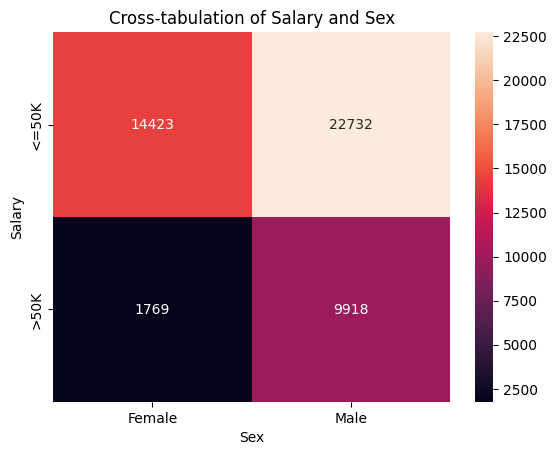

In [ ]:
# Cross-tabulation of Race and Workclass
ct = pd.crosstab(df['Salary'], df['Sex'])
sns.heatmap(ct, annot=True, fmt='d')
plt.title('Cross-tabulation of Salary and Sex')
plt.show()

#### Race and Workclass:

Explore the distribution of races across different work classes.

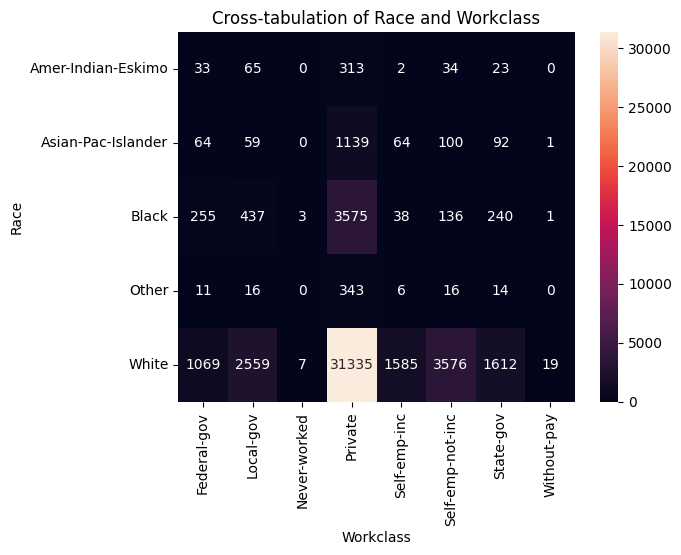

In [ ]:
# Cross-tabulation of Race and Workclass
ct = pd.crosstab(df['Race'], df['Workclass'])
sns.heatmap(ct, annot=True, fmt='d')
plt.title('Cross-tabulation of Race and Workclass')
plt.show()

#### Marital Status and Occupation

See if certain occupations are more common in particular marital statuses.

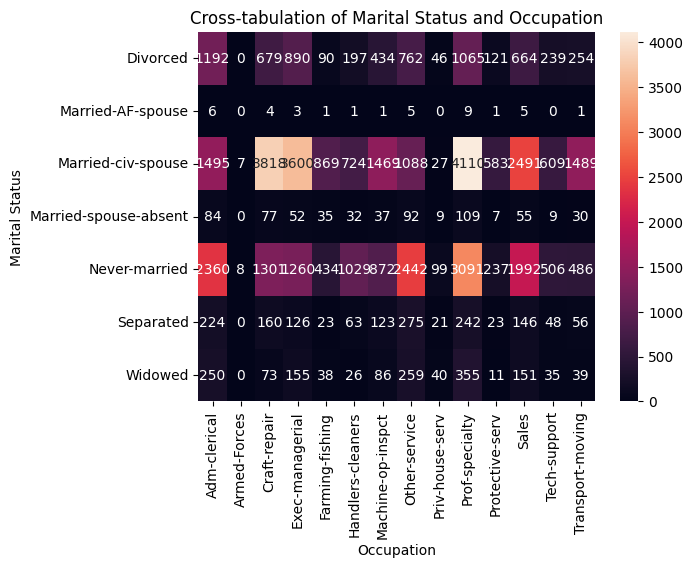

In [ ]:
# Cross-tabulation of Marital Status and Occupation
ct = pd.crosstab(df['Marital Status'], df['Occupation'])
sns.heatmap(ct, annot=True, fmt='d')
plt.title('Cross-tabulation of Marital Status and Occupation')
plt.show()

#### Salary (Categorical) and Hours per Week (Numerical):

This plot will help us understand if there's a noticeable difference in the number of hours worked per week between different salary categories.

In [ ]:
# Box plot of Salary vs Hours per Week
fig = px.box(df, x='Salary', y='Hours per Week', title='Salary vs Hours per Week')
fig.show()



Insight for Salary vs Hours per Week:
- The median number of hours worked per week is higher for individuals earning '>50K'.
- This may suggest a correlation between longer working hours and higher salaries.
- However, the significant overlap in the interquartile ranges indicates that working more hours does not guarantee a higher salary.

#### Race (Categorical) and Age (Numerical):
This plot will give us an idea of whether there are notable age differences among different racial groups.

In [ ]:
# Box plot of Race vs Age
fig = px.box(df, x='Race', y='Age', title='Race vs Age')
fig.show()


Insight for Race vs Age:
- There might be slight differences in the median ages across different races.
- Some racial groups may have wider age ranges indicating greater diversity in ages.
- It’s important to consider cultural, social, and economic factors that might influence these age distributions in different races.

## Preprocess the data

#### Normalizing data using (Min-Max Normalization)

Min-Max Normalization scales the data within a specified range (usually 0 to 1). It's useful when you want to scale the output of a model or understand relative distances between values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# List of continuous variables
continuous_vars = ['Age', 'Education-num', 'Capital Gain', 'Capital Loss', 'Hours per Week']

# Applying Min-Max Normalization
scaler = MinMaxScaler()
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])

# Displaying the first few rows to verify normalization
print(data[continuous_vars].head())


        Age  Education-num  Capital Gain  Capital Loss  Hours per Week
0  0.301370       0.800000       0.02174           0.0        0.397959
1  0.452055       0.800000       0.00000           0.0        0.122449
2  0.287671       0.533333       0.00000           0.0        0.397959
3  0.493151       0.400000       0.00000           0.0        0.397959
4  0.150685       0.800000       0.00000           0.0        0.397959


#### Feature Selection

Since Education and Education - num essential gives the same information removing the redundant feature

In [ ]:
# Dropping a redundant column
data.drop('Education-num', axis=1, inplace=True)

#### Train-Test Split
Split the data into a training set and a test set.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Salary', axis=1)
y = data['Salary']  # Assuming 'Salary' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Scaling the Features

Scale the features as KNN is sensitive to the scale of the data.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((34189, 12), (34189,), (14653, 12), (14653,))

#### Building the KNN Model

##### a. Choosing K

Use cross-validation to find the best value of K.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

accuracy_rates = []

for k in range(1, 21):  # trying different k values
    print(f"Getting neightbours for {k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    accuracy_rates.append(score.mean())

# Determine the best K
best_k = np.argmax(accuracy_rates) + 1  # +1 because index starts at 0
print(f"Best K Value: {best_k}")


Getting neightbours for 1
Getting neightbours for 2
Getting neightbours for 3
Getting neightbours for 4
Getting neightbours for 5
Getting neightbours for 6
Getting neightbours for 7
Getting neightbours for 8
Getting neightbours for 9
Getting neightbours for 10
Getting neightbours for 11
Getting neightbours for 12
Getting neightbours for 13
Getting neightbours for 14
Getting neightbours for 15
Getting neightbours for 16
Getting neightbours for 17
Getting neightbours for 18
Getting neightbours for 19
Getting neightbours for 20
Best K Value: 9


In [ ]:
accuracy_rates

[0.8013982458881639,
 0.8196789838768004,
 0.8206735550534985,
 0.8264354651860298,
 0.8265819378200264,
 0.8290680534260151,
 0.8305306148085485,
 0.8313787304655378,
 0.8319345340831902,
 0.8310570331936751,
 0.8312617628640829,
 0.8318760374467468,
 0.8317298129699262,
 0.8308523719804193,
 0.8314958264241528,
 0.830676822171081,
 0.8302380802834675,
 0.8299164172401806,
 0.8297115848840446,
 0.830267388501697]

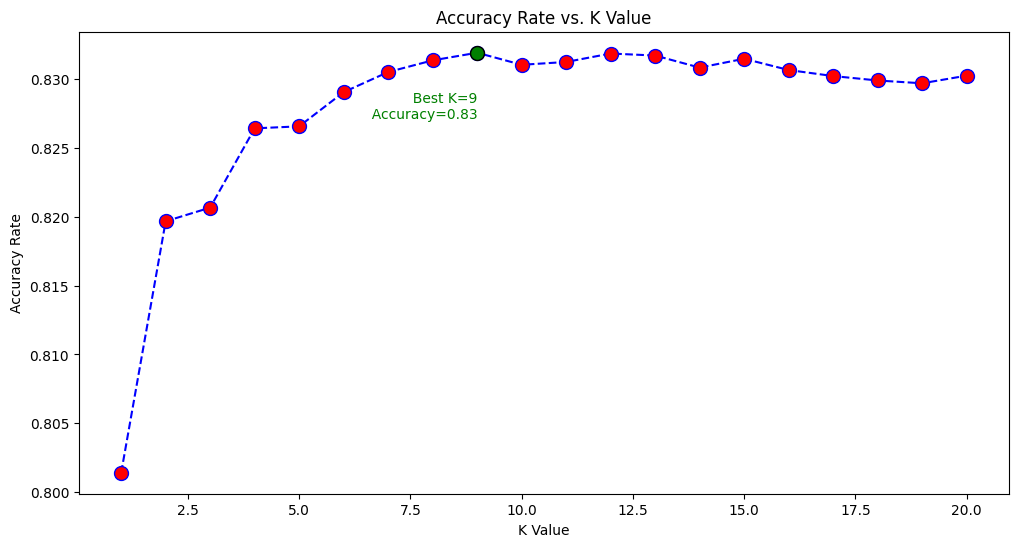

In [ ]:
# visualizing the choice of k
# Assuming best_k and accuracy_rates are already defined
best_k_accuracy = accuracy_rates[best_k - 1]  # -1 because list indices start at 0

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

# Highlighting the best K value
plt.scatter(best_k, best_k_accuracy, color='green', s=100, edgecolor='black', zorder=5)
plt.text(best_k, best_k_accuracy-0.005, f'  Best K={best_k}\n  Accuracy={best_k_accuracy:.2f}', verticalalignment='bottom', horizontalalignment='right', color='green')

plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.show()


##### b. Training the Model

Train the model using the selected K.

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

##### c. Model Evaluation



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_train_pred = knn_final.predict(X_train_scaled)
y_test_pred = knn_final.predict(X_test_scaled)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrices
train_conf_mat = confusion_matrix(y_train, y_train_pred)
test_conf_mat = confusion_matrix(y_test, y_test_pred)

# Classification Reports
train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.8634356079440756
Testing Accuracy: 0.8284310380126937


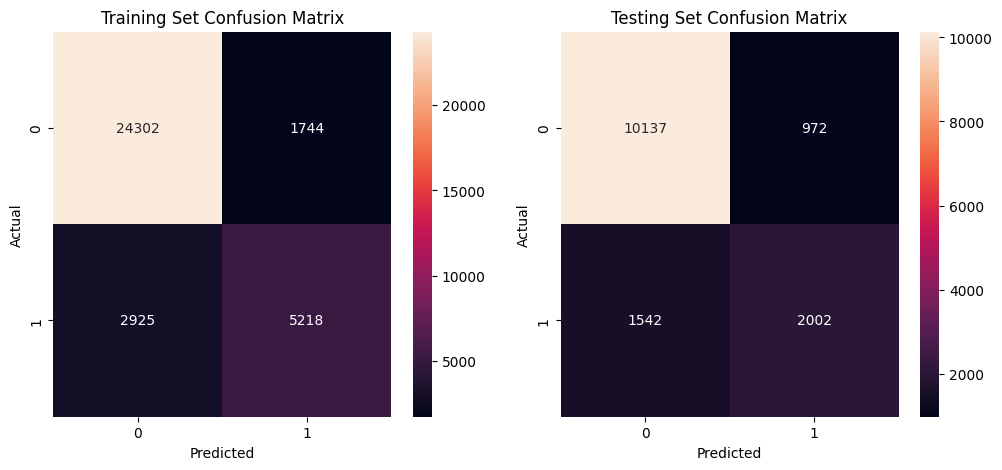

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Training Confusion Matrix
sns.heatmap(train_conf_mat, annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Training Set Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Testing Confusion Matrix
sns.heatmap(test_conf_mat, annot=True, fmt='d', ax=ax[1])
ax[1].set_title('Testing Set Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()


In [ ]:
print("Classification Report for Training Set:")
print(train_class_report)
print("\nClassification Report for Testing Set:")
print(test_class_report)


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     26046
           1       0.75      0.64      0.69      8143

    accuracy                           0.86     34189
   macro avg       0.82      0.79      0.80     34189
weighted avg       0.86      0.86      0.86     34189


Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11109
           1       0.67      0.56      0.61      3544

    accuracy                           0.83     14653
   macro avg       0.77      0.74      0.75     14653
weighted avg       0.82      0.83      0.82     14653



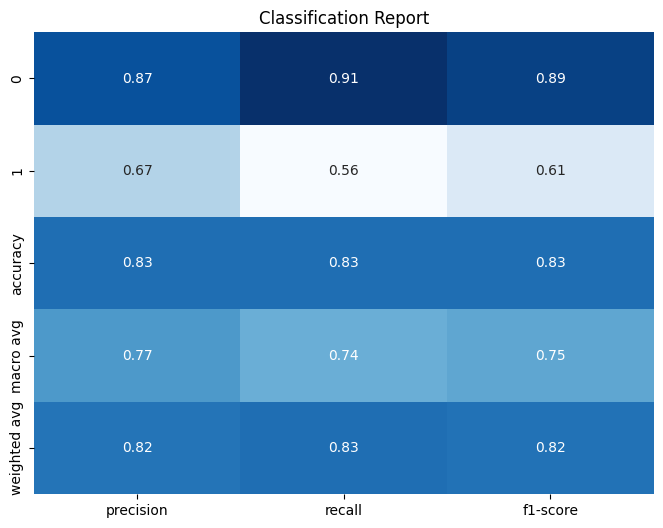

In [ ]:
# Assuming y_test and y_pred are already defined
report = classification_report(y_test, y_test_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column if you don't want to visualize it
report_df.drop('support', axis=1, inplace=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report')
plt.show()


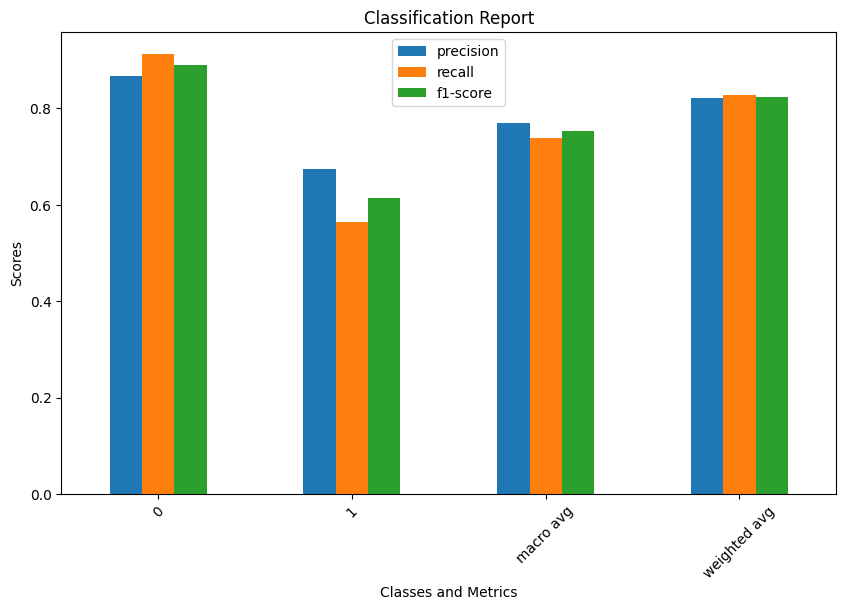

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Drop the 'support' column for visualization
report_df.drop('support', axis=1, inplace=True, errors='ignore')
# Drop the 'accuracy' row as it's a single value, not part of each class
report_df = report_df.drop('accuracy', errors='ignore')

# Plotting
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xlabel('Classes and Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()



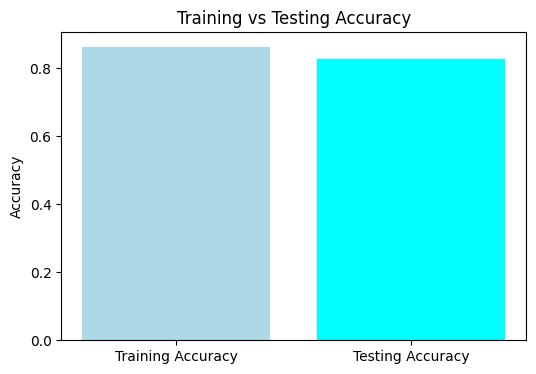

Insights on Model Fit:
- Slight difference in accuracy suggests a good fit without major overfitting concerns.


In [ ]:
# Plotting Training vs Testing Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['lightblue', 'cyan'])
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.show()

# Insights
print("Insights on Model Fit:")
if train_accuracy > test_accuracy:
    if (train_accuracy - test_accuracy) > 0.1:
        print("- There is a significant drop in accuracy from training to testing, indicating potential overfitting.")
    else:
        print("- Slight difference in accuracy suggests a good fit without major overfitting concerns.")
else:
    print("- The model performs better or equally on the testing set, indicating no overfitting. Be cautious of underfitting if both accuracies are low.")

In [ ]:
ACCURACY_THRESHOLD = 0.8  # Define as per your criteria
PERFORMANCE_GAP = 0.1  # Acceptable gap between training and testing accuracy

In [ ]:
# Comparing accuracies
accuracy_gap = abs(train_accuracy - test_accuracy)

# Insights on accuracies
print("Accuracy Insights:")
if train_accuracy > ACCURACY_THRESHOLD and test_accuracy > ACCURACY_THRESHOLD:
    print("- Both training and testing accuracies are high, indicating a well-performing model.")
elif train_accuracy > ACCURACY_THRESHOLD:
    print("- High training accuracy suggests good learning, but be cautious of potential overfitting.")
else:
    print("- Training accuracy is not optimal, indicating the model might not be learning effectively.")

# Insights on overfitting/underfitting
print("\nModel Fit Insights:")
if accuracy_gap > PERFORMANCE_GAP:
    if train_accuracy > test_accuracy:
        print("- Potential overfitting: The model performs well on training data but not as well on unseen data.")
    else:
        print("- Potential underfitting: The model performs unexpectedly better on testing data or both accuracies are low.")
else:
    print("- Acceptable performance gap: The model generalizes well from training to testing data.")


Accuracy Insights:
- Both training and testing accuracies are high, indicating a well-performing model.

Model Fit Insights:
- Acceptable performance gap: The model generalizes well from training to testing data.


## Classification Report Insights for Testing Set

- **Overall Performance**:
  - The accuracy of the model is 0.83, indicating that it correctly predicts the outcome 83% of the time across both classes. This reflects the model's overall effectiveness.

- **Performance on Class 0 (Precision: 0.87, Recall: 0.91)**:
  - High **precision** (0.87) for class 0 suggests that when the model predicts class 0, it is correct 87% of the time.
  - High **recall** (0.91) indicates the model is able to identify 91% of the actual class 0 instances effectively.
  - The **F1-score** of 0.89 denotes a strong balance between precision and recall for class 0.

- **Performance on Class 1 (Precision: 0.67, Recall: 0.56)**:
  - **Precision** for class 1 is lower at 0.67, meaning the model is correct 67% of the time when it predicts class 1.
  - The **recall** for class 1 is 0.56, suggesting the model misses a significant portion of class 1 instances.
  - The **F1-score** of 0.61 for class 1 reflects the lower precision and recall, indicating areas for improvement.

- **Macro and Weighted Averages**:
  - **Macro average** scores show a precision of 0.77, recall of 0.74, and F1-score of 0.75, useful for understanding performance across classes.
  - **Weighted average** scores consider class imbalance and are closer to the majority class's performance.

- **Insights on Model Bias and Areas for Improvement**:
  - The model shows better performance in predicting class 0 compared to class 1. This might be due to class imbalance or inherent complexity in predicting class 1.
  - Improvement efforts should focus on class 1, possibly by addressing class imbalance or refining the model.

- **Consideration for Class Imbalance**:
  - The model's proficiency in predicting class 0 might be influenced by class imbalance. In such cases, relying solely on accuracy might be misleading, and precision, recall, and F1-score become crucial metrics.


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt



# Assuming knn_final is your trained KNN model and X_test_scaled, y_test are your test datasets
perm_importance = permutation_importance(knn_final, X_test_scaled, y_test)

# Get feature importances and their corresponding standard deviations
feature_importances = perm_importance.importances_mean
importance_std = perm_importance.importances_std

# Get feature names
feature_names = X.columns  # Assuming X is your DataFrame of features


In [ ]:
# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances, 'std_dev': importance_std})
importance_df.sort_values(by='importance', ascending=False, inplace=True)

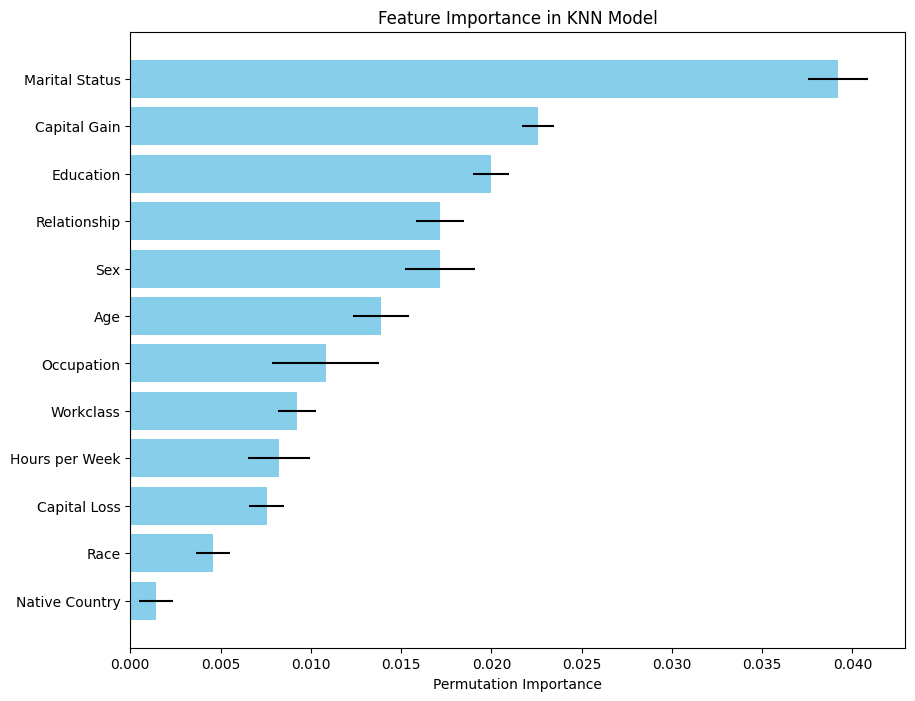

In [ ]:
# visualizing feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['importance'], xerr=importance_df['std_dev'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance in KNN Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


In [ ]:
importance_df

feature  importance   std_dev
3   Marital Status    0.039214  0.001663
8     Capital Gain    0.022589  0.000891
2        Education    0.019996  0.001000
5     Relationship    0.017171  0.001341
7              Sex    0.017157  0.001925
0              Age    0.013908  0.001558
4       Occupation    0.010837  0.002963
1        Workclass    0.009227  0.001053
10  Hours per Week    0.008244  0.001723
9     Capital Loss    0.007548  0.000946
6             Race    0.004586  0.000949
11  Native Country    0.001406  0.000946

**Feature Importance Insights:**

* Marital Status is the most influential feature, indicating a strong link between marital status and the target variable.
* Capital Gain and Education follow in importance, highlighting the significance of financial status and educational background in the model's predictions.
* Relationship and Sex also play notable roles, suggesting that family dynamics and gender are key factors.
* Age and Occupation have moderate impacts, whereas Workclass, Hours per Week, and Capital Loss are less influential but still relevant.
* Race and Native Country have the least impact, suggesting minimal reliance on these features for predictions.
* Overall, socio-economic and demographic factors dominate the model's decision-making process, with marital status, capital gain, and education being the top determinants. The relatively lower importance of race and native country indicates these factors are not primary drivers in the model's predictions.